# Importing Libraries

In [2]:
import numpy as nd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [3]:
train_tweets_csv = pd.read_csv('tweets.csv')
test_tweets_csv = pd.read_csv('test_tweets.csv')
train_tweets_csv.head()

,created_at,tweet_text,sentiment,typeofsentiment
0,2019-12-16 03:07:07,"['RT', 'sandboxpete', 'get', 'heart', 'impeach...",0,neutral
1,2019-12-16 03:07:07,"['RT', 'AdamParkhomenko', 'ANOTHER', 'Fox', 'N...",1,positive
2,2019-12-16 03:07:07,"['RT', 'TheBabylonBee', 'House', 'Dems', 'Unve...",1,positive
3,2019-12-16 03:07:06,"['RT', 'feralsapphic', 'love', 'women', 'natur...",1,positive
4,2019-12-16 03:07:06,"['RT', 'TeaPainUSA', 'Every', 'cogent', 'Ameri...",0,neutral


In [4]:
train_tweets = train_tweets_csv[['tweet_text', 'sentiment', 'typeofsentiment']]
test_tweets = test_tweets_csv[['tweet_text']]

# Data Analysis

6.0
4.0


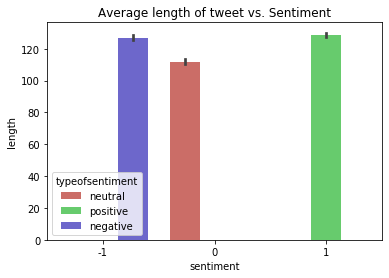

In [5]:
train_tweets['length'] = train_tweets['tweet_text'].apply(len)
temp = train_tweets['typeofsentiment']

fig1 = sns.barplot(x = 'sentiment', y = 'length', hue = temp, data = train_tweets, palette = 'hls')
plot_size2 = plt.rcParams["figure.figsize"] 
print(plot_size2[0]) 
print(plot_size2[1])

plot_size2[0] = 7
plot_size2[1] = 6
plt.rcParams["figure.figsize"] = plot_size2 

plt.title("Average length of tweet vs. Sentiment")
plt.show()
plot = fig1.get_figure()
plot.savefig('./tweet-dashboard/src/assets/Bargraph.png')

In [6]:
train_tweets.head()

,tweet_text,sentiment,typeofsentiment,length
0,"['RT', 'sandboxpete', 'get', 'heart', 'impeach...",0,neutral,95
1,"['RT', 'AdamParkhomenko', 'ANOTHER', 'Fox', 'N...",1,positive,171
2,"['RT', 'TheBabylonBee', 'House', 'Dems', 'Unve...",1,positive,108
3,"['RT', 'feralsapphic', 'love', 'women', 'natur...",1,positive,75
4,"['RT', 'TeaPainUSA', 'Every', 'cogent', 'Ameri...",0,neutral,75


7.0
6.0


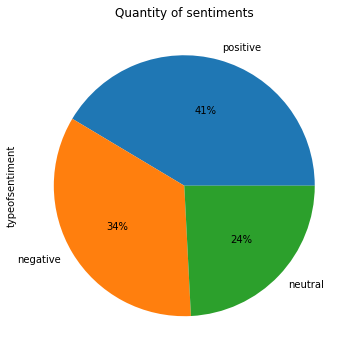

In [7]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 7
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
plt.title("Quantity of sentiments")
fig2 = train_tweets['typeofsentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plot2 = fig2.get_figure()
plot2.savefig('./tweet-dashboard/src/assets/Piechart.png')

# Model Selection & Machine Learning

In [8]:
X = train_tweets['tweet_text']
print(X)
y = train_tweets['sentiment']

0       ['RT', 'sandboxpete', 'get', 'heart', 'impeach...
1       ['RT', 'AdamParkhomenko', 'ANOTHER', 'Fox', 'N...
2       ['RT', 'TheBabylonBee', 'House', 'Dems', 'Unve...
3       ['RT', 'feralsapphic', 'love', 'women', 'natur...
4       ['RT', 'TeaPainUSA', 'Every', 'cogent', 'Ameri...
                              ...                        
9405    ['RT', 'NFL', 'JamesConner', 'back', 'yards', ...
9406    ['RT', 'GavinNewsom', 'Trump', 'try', 'slash',...
9407    ['RT', 'Jill', 'Biden', 'say', 'Trump', 'afrai...
9408    ['RT', 'FundAndrewYang', 'Tech', 'redefine', '...
9409    ['RT', 'PM', 'tweet', 'injury', 'Shikhar', 'Dh...
Name: tweet_text, Length: 9410, dtype: object


In [9]:
test = test_tweets[['tweet_text']]

## Using Support Vector Machine:
### Training

In [10]:
tw_train, tw_test, label_train, label_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [11]:
pipe = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svm', LinearSVC(max_iter=100, 
                        C=2.0
                    ))
])

pipe.fit(tw_train, label_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('svm',
                 LinearSVC(C=2.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                   

### Prediction

In [13]:
svm_predictions = pipe.predict(tw_test)
classification_result = classification_report(svm_predictions,label_test)
accuracy = accuracy_score(label_test, svm_predictions)

confusion_matrix(label_test, svm_predictions)

array([[531,  42,  65],
       [ 47, 365,  48],
       [ 33,  35, 716]])

In [14]:
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

          -1       0.83      0.87      0.85       611
           0       0.79      0.83      0.81       442
           1       0.91      0.86      0.89       829

    accuracy                           0.86      1882
   macro avg       0.85      0.85      0.85      1882
weighted avg       0.86      0.86      0.86      1882

0.8565356004250797


## Using Naive Bayes classifier:
### Training

In [15]:
print(test_tweets)

tweet_text
0     ['Women', 'Tag', 'Team', 'Title', 'match', 'pr...
1     ['RT', 'Trump', 'secure', 'appellate', 'court'...
2     ['RT', 'WWEUniverse', 'team', 'leave', 'WWETLC...
3     ['RT', 'AnnieGrayerCNN', 'Last', 'night', 'Nas...
4     ['RT', 'MSNBC', 'Several', 'major', 'newspaper...
...                                                 ...
9391  ['queenjamesss', 'BarbieThanos', 'disturb', 't...
9392  ['RT', 'CapehartJ', 'REMINDER', 'Democrats', '...
9393  ['RT', 'KeepMyPowerOrg', 'interest', 'Trump', ...
9394  ['RT', 'NFL', 'AdrianPeterson', 'tie', 'Walter...
9395  ['RT', 'ZackBornstein', 'want', 'confirm', 'Tr...

[9396 rows x 1 columns]


In [16]:
pipe2 = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB(alpha=2.1))
])

pipe2.fit(tw_train, label_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=2.1, class_prior=None, fit_prior=True))],
         verbose=False)

### Prediction

In [17]:
nb_predictions = pipe2.predict(tw_test)

classification_result = classification_report(nb_predictions,label_test)
accuracy = accuracy_score(label_test, nb_predictions)
confusion_matrix(label_test, nb_predictions)

array([[474,   3, 161],
       [ 67, 215, 178],
       [ 25,   4, 755]])

In [18]:
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

          -1       0.74      0.84      0.79       566
           0       0.47      0.97      0.63       222
           1       0.96      0.69      0.80      1094

    accuracy                           0.77      1882
   macro avg       0.72      0.83      0.74      1882
weighted avg       0.84      0.77      0.78      1882

0.767268862911796
